In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


## Preprocessing

In [3]:
data.shape

(7920, 3)

In [4]:
data.duplicated().sum()

np.int64(0)

In [5]:
data.isna().sum()

id       0
label    0
tweet    0
dtype: int64

### Text Preprocessing

In [6]:
import re
import string

convert to uppercase to lowercase

In [7]:
data['tweet'] = data['tweet'].apply(lambda sentence : " ".join(word.lower() for word in sentence.split()))
data.head()

,id,label,tweet
0,1,0,#fingerprint #pregnancy test https://goo.gl/h1...
1,2,0,finally a transparant silicon case ^^ thanks t...
2,3,0,we love this! would you go? #talk #makememorie...
3,4,0,i'm wired i know i'm george i was made that wa...
4,5,1,what amazing service! apple won't even talk to...


remove links

In [8]:
data['tweet'] = data['tweet'].apply(lambda sentence : " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', word, flags = re.MULTILINE) for word in sentence.split()))
data.head()

,id,label,tweet
0,1,0,#fingerprint #pregnancy test #android #apps #...
1,2,0,finally a transparant silicon case ^^ thanks t...
2,3,0,we love this! would you go? #talk #makememorie...
3,4,0,i'm wired i know i'm george i was made that wa...
4,5,1,what amazing service! apple won't even talk to...


remove punctuations

In [9]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data['tweet'] = data['tweet'].apply(remove_punctuations)
data.head()

,id,label,tweet
0,1,0,fingerprint pregnancy test android apps beaut...
1,2,0,finally a transparant silicon case thanks to ...
2,3,0,we love this would you go talk makememories un...
3,4,0,im wired i know im george i was made that way ...
4,5,1,what amazing service apple wont even talk to m...


remove numbers

In [11]:
data['tweet'] = data['tweet'].str.replace('\d+', '', regex = True)

remove stopwords

In [12]:
!pip install nltk

In [13]:
import nltk

In [14]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [15]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [16]:
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [17]:
data['tweet'] = data['tweet'].apply(lambda sentence : " ".join(word for word in sentence.split() if word not in sw))

In [18]:
data.head()

,id,label,tweet
0,1,0,fingerprint pregnancy test android apps beauti...
1,2,0,finally transparant silicon case thanks uncle ...
2,3,0,love would go talk makememories unplug relax i...
3,4,0,im wired know im george made way iphone cute d...
4,5,1,amazing service apple wont even talk question ...


stemming

In [19]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [20]:
data['tweet'] = data['tweet'].apply(lambda  sentence : " ".join(ps.stem(word) for word in sentence.split()))

In [21]:
data.head()

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...


## create vocabulary

In [22]:
from collections import Counter
vocab = Counter()

In [23]:
vocab

Counter()

In [24]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [25]:
len(vocab)

15949

In [26]:
token = [key for key in vocab if vocab[key] > 10]

In [27]:
len(token)

1145

In [28]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w' ,encoding='utf-8')
    file.write(data)
    file.close()


In [29]:
save_vocabulary(token, '../static/model/vocabulary.txt')

## divide dataset

In [30]:
!pip install scikit-learn

In [31]:
from sklearn.model_selection import train_test_split
x = data['tweet']
y = data['label']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

## vectorization

In [33]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []

    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1

        vectorized_lst.append(sentence_lst)

    vectorized_lst_new = np.asarray(vectorized_lst, dtype = np.float32)
    return vectorized_lst_new

In [34]:
vectorized_x_train = vectorizer(x_train, token)

In [35]:
vectorized_x_test = vectorizer(x_test, token)

## check data set

In [1]:
y_train.value_counts()

NameError: name 'y_train' is not defined

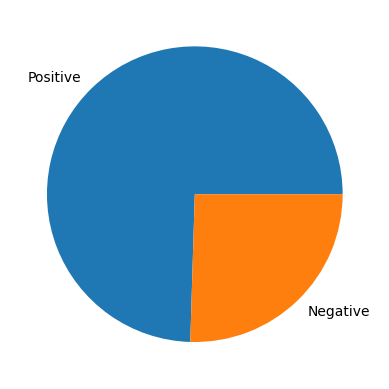

In [37]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels = ["Positive", "Negative"])
plt.show()

## handle imbalanced dataset

In [38]:
!pip install imbalanced-learn

In [39]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)

C:\Users\ASUS\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\ASUS\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ASUS\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^

In [40]:
y_train_smote.value_counts()

label
0    4721
1    4721
Name: count, dtype: int64

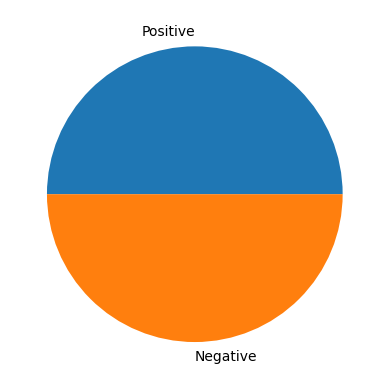

In [41]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels = ["Positive", "Negative"])
plt.show()

In [42]:
vectorized_x_train_smote 
y_train_smote
vectorized_x_test
y_test

3390    1
143     0
6858    0
4314    0
2304    0
       ..
1062    0
4101    0
6711    0
5808    0
760     0
Name: label, Length: 1584, dtype: int64